In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


## KNN

MSE: 1.1908171715021176


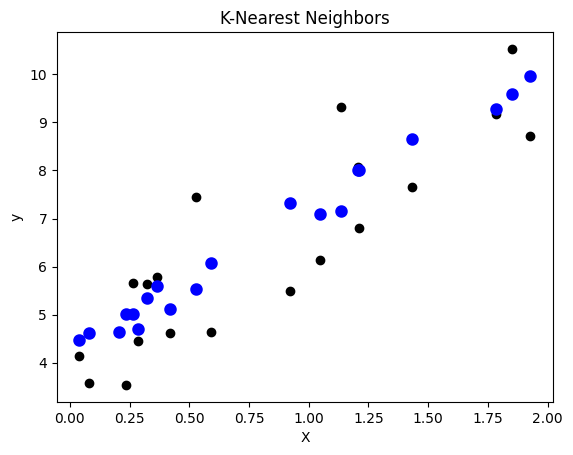

In [21]:
# Generación de datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación del modelo KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predicción
y_pred = knn_reg.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Gráfica
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('K-Nearest Neighbors')
plt.show()


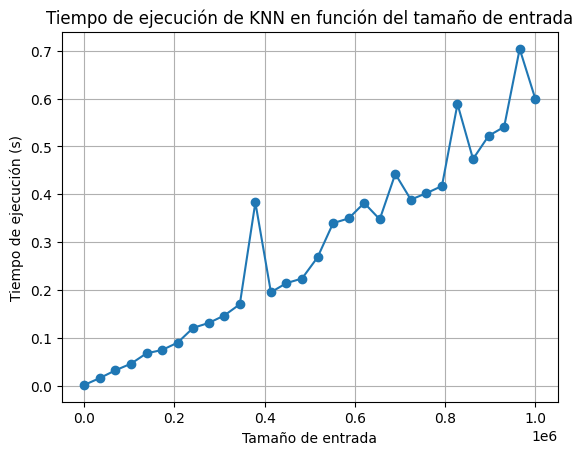

In [22]:
def generate_data(n):
    X = 2 * np.random.rand(n, 1)
    y = 4 + 3 * X + np.random.randn(n, 1)
    return X, y

# Tamaños de entrada 
input_sizes = np.linspace(100, 1000000, 30, dtype=int)

# tiempos de ejecución
times = []
for size in input_sizes:
    X, y = generate_data(size)
    start_time = time.time()
    knn_reg = KNeighborsRegressor(n_neighbors=3)
    knn_reg.fit(X, y)
    end_time = time.time()
    times.append(end_time - start_time)

# Gráfica de tiempos de ejecución
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución de KNN en función del tamaño de entrada')
plt.grid(True)
plt.show()

MSE para regresión polinomial: 0.0023866932026829625


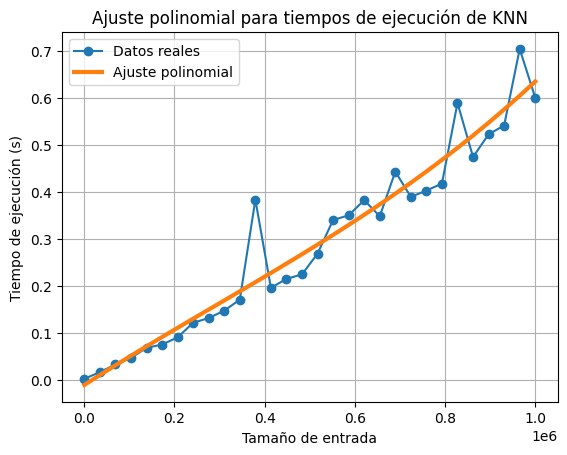

In [23]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(input_sizes.reshape(-1, 1))

# modelo polinomial
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, times)

# Predicción de tiempos 
times_pred = poly_reg_model.predict(X_poly)


mse_poly = mean_squared_error(times, times_pred)
print(f'MSE para regresión polinomial: {mse_poly}')

plt.plot(input_sizes, times, marker='o', label='Datos reales')
plt.plot(input_sizes, times_pred, label='Ajuste polinomial', linewidth=3)
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Ajuste polinomial para tiempos de ejecución de KNN')
plt.legend()
plt.grid(True)
plt.show()


## Linear Regresion

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


Coeficientes: [[2.93647151]]
Intercepto: [4.32235853]
R^2: 0.7424452332071367


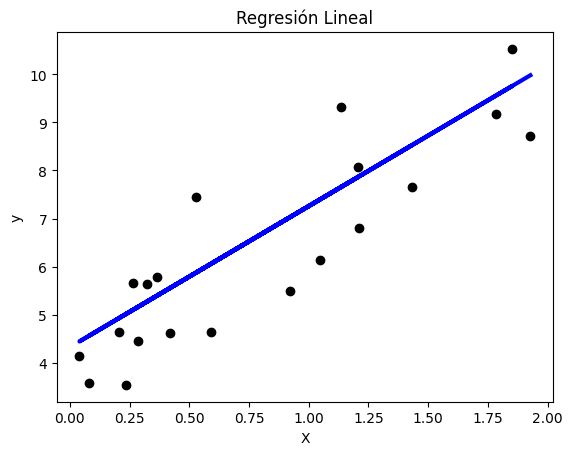

In [25]:
# Generación de datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación del modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicción
y_pred = lin_reg.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
print(f'Coeficientes: {lin_reg.coef_}')
print(f'Intercepto: {lin_reg.intercept_}')
print(f'R^2: {r2}')

# Gráfica
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()

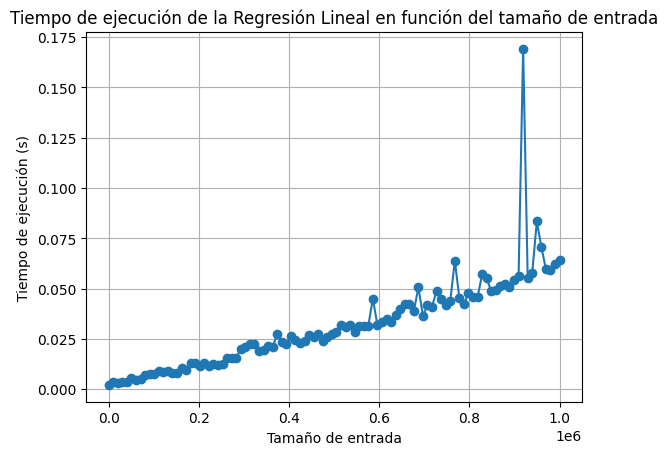

In [26]:
def generate_data(n):
    X = 2 * np.random.rand(n, 1)
    y = 4 + 3 * X + np.random.randn(n, 1)
    return X, y

# Tamaños de entrada para las pruebas
input_sizes = np.linspace(100, 1000000, 100, dtype=int)  


times = []
for size in input_sizes:
    X, y = generate_data(size)
    start_time = time.time()
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    end_time = time.time()
    times.append(end_time - start_time)

# Gráfica 
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución de la Regresión Lineal en función del tamaño de entrada')
plt.grid(True)
plt.show()


MSE para regresión polinomial: 0.0001340918953010116


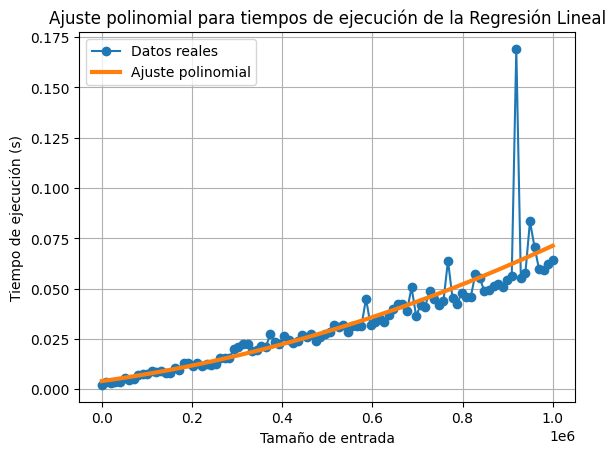

In [27]:
# Preparación de datos para la regresión polinomial
poly_features = PolynomialFeatures(degree=2) 
X_poly = poly_features.fit_transform(input_sizes.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, times)

times_pred = poly_reg_model.predict(X_poly)

mse_poly = mean_squared_error(times, times_pred)
print(f'MSE para regresión polinomial: {mse_poly}')

# Gráfica
plt.plot(input_sizes, times, marker='o', label='Datos reales')
plt.plot(input_sizes, times_pred, label='Ajuste polinomial', linewidth=3)
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Ajuste polinomial para tiempos de ejecución de la Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()
